# Task 2 - Regularization

The following regularization techniques were applied

* L1L2 Regularization of kernels
* Dropout network

The plots can be found below

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL.Image
import IPython.display as display
import warnings

In [2]:
cifar10 = keras.datasets.cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

data = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, y_train.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128)

test_data = tf.data.Dataset.from_tensor_slices(
    (x_test.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, y_test.astype(np.int32))).batch(64)

170500096/170498071 [==============================] - 7s 0us/step


In [9]:
learning_rate = 0.001
opt = keras.optimizers.Adam(lr = learning_rate)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
no_classes = 10
epochs = 50
batch_size = 32
val_split = 0.2
Dropout_Factor = 0.25
img_width, img_height, num_channels = 32,32,3
input_shape = (img_width, img_height, num_channels)

logdir = "logs/Adam_0.001"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [11]:
model.compile(optimizer=opt,loss=loss_fn,metrics=["accuracy"])
plain_history = model.fit(data,batch_size = batch_size,epochs = 100,validation_data = (test_data),callbacks=[tensorboard_callback])

Epoch 1/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6429 - accuracy: 0.3961 - val_loss: 1.3460 - val_accuracy: 0.5088
Epoch 2/100
391/391 [==============================] - 4s 9ms/step - loss: 1.2449 - accuracy: 0.5525 - val_loss: 1.2337 - val_accuracy: 0.5647
Epoch 3/100
391/391 [==============================] - 4s 9ms/step - loss: 1.0874 - accuracy: 0.6150 - val_loss: 1.0519 - val_accuracy: 0.6267
Epoch 4/100
391/391 [==============================] - 4s 10ms/step - loss: 0.9605 - accuracy: 0.6623 - val_loss: 1.0125 - val_accuracy: 0.6495
Epoch 5/100
391/391 [==============================] - 4s 10ms/step - loss: 0.8754 - accuracy: 0.6928 - val_loss: 0.9529 - val_accuracy: 0.6712
Epoch 6/100
391/391 [==============================] - 4s 9ms/step - loss: 0.8036 - accuracy: 0.7195 - val_loss: 0.8785 - val_accuracy: 0.6938
Epoch 7/100
391/391 [==============================] - 4s 9ms/step - loss: 0.7358 - accuracy: 0.7426 - val_loss: 0.8636 - val_accuracy: 0.7

In [12]:
model_with_regularizer = Sequential()
model_with_regularizer.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,kernel_initializer = 'random_normal',kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
model_with_regularizer.add(MaxPooling2D(pool_size=(2, 2)))
model_with_regularizer.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal',kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
model_with_regularizer.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model_with_regularizer.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal',kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
model_with_regularizer.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model_with_regularizer.add(Flatten())
model_with_regularizer.add(Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
model_with_regularizer.add(Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
model_with_regularizer.add(Dense(no_classes, activation='softmax'))

learning_rate = 0.001
opt = keras.optimizers.Adam(lr = learning_rate)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
no_classes = 10
epochs = 50
batch_size = 32
val_split = 0.2
Dropout_Factor = 0.25
img_width, img_height, num_channels = 32,32,3
input_shape = (img_width, img_height, num_channels)


In [13]:
logdir = "logs/L1 L2 regularizers"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model_with_regularizer.compile(optimizer=opt,loss=loss_fn,metrics=["accuracy"])
regulaizer_history = model_with_regularizer.fit(data,batch_size = batch_size,epochs = 100,validation_data = (test_data),callbacks=[tensorboard_callback])

Epoch 1/100
391/391 [==============================] - 4s 10ms/step - loss: 1.7726 - accuracy: 0.3770 - val_loss: 1.4978 - val_accuracy: 0.4959
Epoch 2/100
391/391 [==============================] - 4s 9ms/step - loss: 1.3945 - accuracy: 0.5297 - val_loss: 1.3040 - val_accuracy: 0.5682
Epoch 3/100
391/391 [==============================] - 4s 9ms/step - loss: 1.2337 - accuracy: 0.5975 - val_loss: 1.2884 - val_accuracy: 0.5903
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 1.1212 - accuracy: 0.6407 - val_loss: 1.1337 - val_accuracy: 0.6471
Epoch 5/100
391/391 [==============================] - 4s 9ms/step - loss: 1.0317 - accuracy: 0.6774 - val_loss: 1.0625 - val_accuracy: 0.6717
Epoch 6/100
391/391 [==============================] - 4s 9ms/step - loss: 0.9591 - accuracy: 0.7032 - val_loss: 1.0221 - val_accuracy: 0.6867
Epoch 7/100
391/391 [==============================] - 4s 9ms/step - loss: 0.9071 - accuracy: 0.7257 - val_loss: 1.0033 - val_accuracy: 0.697

In [21]:
learning_rate = 0.001
opt = keras.optimizers.Adam(lr = learning_rate)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
no_classes = 10
epochs = 50
batch_size = 32
val_split = 0.2
Dropout_Factor = 0.25
img_width, img_height, num_channels = 32,32,3
input_shape = (img_width, img_height, num_channels)

Dropout_model = Sequential()
Dropout_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,kernel_initializer = 'random_normal'))
Dropout_model.add(MaxPooling2D(pool_size=(2, 2)))
Dropout_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal'))
Dropout_model.add(MaxPooling2D(pool_size=(2, 2)))
Dropout_model.add(Dropout(0.25))
Dropout_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal'))
Dropout_model.add(MaxPooling2D(pool_size=(2, 2)))
Dropout_model.add(Dropout(0.25))
Dropout_model.add(Flatten())
Dropout_model.add(Dense(256, activation='relu'))
Dropout_model.add(Dense(128, activation='relu'))
Dropout_model.add(Dense(no_classes, activation='softmax'))


logdir = "logs/dropouts"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
Dropout_model.compile(optimizer=opt,loss=loss_fn,metrics=["accuracy"])
Dropout_history = Dropout_model.fit(data,batch_size = batch_size,epochs = 100,validation_data = (test_data),callbacks=[tensorboard_callback])

Epoch 1/100
391/391 [==============================] - 5s 12ms/step - loss: 1.7099 - accuracy: 0.3664 - val_loss: 1.4900 - val_accuracy: 0.4673
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 1.3459 - accuracy: 0.5131 - val_loss: 1.2497 - val_accuracy: 0.5512
Epoch 3/100
391/391 [==============================] - 4s 12ms/step - loss: 1.2101 - accuracy: 0.5668 - val_loss: 1.0865 - val_accuracy: 0.6153
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 1.1064 - accuracy: 0.6092 - val_loss: 1.0240 - val_accuracy: 0.6397
Epoch 5/100
391/391 [==============================] - 4s 11ms/step - loss: 1.0395 - accuracy: 0.6341 - val_loss: 0.9633 - val_accuracy: 0.6637
Epoch 6/100
391/391 [==============================] - 4s 11ms/step - loss: 0.9747 - accuracy: 0.6558 - val_loss: 0.8961 - val_accuracy: 0.6887
Epoch 7/100
391/391 [==============================] - 4s 11ms/step - loss: 0.9283 - accuracy: 0.6724 - val_loss: 0.9042 - val_accuracy:

In [31]:
learning_rate = 0.001
opt = keras.optimizers.Adam(lr = learning_rate)
loss_fn = keras.losses.SparseCategoricalCrossentropy()
no_classes = 10
epochs = 50
batch_size = 32
val_split = 0.2
Dropout_Factor = 0.25
img_width, img_height, num_channels = 32,32,3
input_shape = (img_width, img_height, num_channels)

Dropout_model = Sequential()
Dropout_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape,kernel_initializer = 'random_normal'))
Dropout_model.add(MaxPooling2D(pool_size=(2, 2)))
Dropout_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal',kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
Dropout_model.add(MaxPooling2D(pool_size=(2, 2)))
Dropout_model.add(Dropout(0.25))
Dropout_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',kernel_initializer = 'random_normal',kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
Dropout_model.add(MaxPooling2D(pool_size=(2, 2)))
Dropout_model.add(Dropout(0.25))
Dropout_model.add(Flatten())
Dropout_model.add(Dense(256, activation='relu'))
Dropout_model.add(Dense(128, activation='relu'))
Dropout_model.add(Dense(no_classes, activation='softmax'))


logdir = "logs/dropouts"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
Dropout_model.compile(optimizer=opt,loss=loss_fn,metrics=["accuracy"])
Dropout_regularizers_history = Dropout_model.fit(data,batch_size = batch_size,epochs = 100,validation_data = (test_data),callbacks=[tensorboard_callback])

Epoch 1/100
391/391 [==============================] - 3s 9ms/step - loss: 1.7520 - accuracy: 0.3634 - val_loss: 1.4672 - val_accuracy: 0.4758
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: 1.3953 - accuracy: 0.5096 - val_loss: 1.2635 - val_accuracy: 0.5630
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: 1.2467 - accuracy: 0.5709 - val_loss: 1.1460 - val_accuracy: 0.6178
Epoch 4/100
391/391 [==============================] - 3s 8ms/step - loss: 1.1550 - accuracy: 0.6027 - val_loss: 1.0756 - val_accuracy: 0.6421
Epoch 5/100
391/391 [==============================] - 3s 8ms/step - loss: 1.0778 - accuracy: 0.6372 - val_loss: 1.0195 - val_accuracy: 0.6594
Epoch 6/100
391/391 [==============================] - 3s 8ms/step - loss: 1.0272 - accuracy: 0.6549 - val_loss: 0.9474 - val_accuracy: 0.6930
Epoch 7/100
391/391 [==============================] - 3s 8ms/step - loss: 0.9725 - accuracy: 0.6748 - val_loss: 0.9212 - val_accuracy: 0.6998

## L1 L2 Regularization

The l1 l2 regularizers are applied to all the convolution kernels. A maximum Validation accuracy of 71.8% is obtained. The model converged at 17th epoch after which the the validation accuracy varied around 71-72%

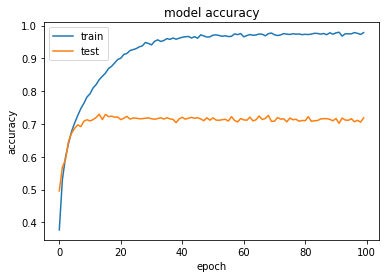

In [18]:
plt.plot(regulaizer_history.history['accuracy'])
plt.plot(regulaizer_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Dropout and regularization

This gave comparitively better result. The model could achieve a maximum validation accuracy of 79% and it stopped converging around 25th epoch

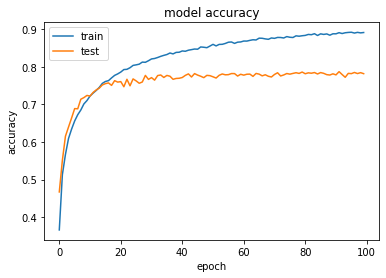

In [23]:
plt.plot(Dropout_history.history['accuracy'])
plt.plot(Dropout_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()